In [70]:
#import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import json
from math import sqrt

In [68]:
#membuat fungsi LinearRegression
def LinearRegression(experience=None, graph=False, acc=False):
  #Membuka file train.json sebagai traning data
  with open('train.json', 'r') as file:
    jsondata = file.read()
    datas = json.loads(jsondata)

    """
    salary = Y atau Variable Dependent
    age = X atau Variable Independent
    """

    totalDataTrain = int((len(datas) * 80) / 100)
    totalDataTest = int(len(datas) - totalDataTrain)

    # Data Test
    agetrain = np.array([data['age'] for data in datas[0:totalDataTrain]])
    salarytrain = np.array([data['salary'] for data in datas[0:totalDataTrain]])
    # Data Train
    agetest = np.array([data['age'] for data in datas[totalDataTrain:]])
    salarytest = np.array([data['salary'] for data in datas[totalDataTrain:]])

    #menghitung jumlah data dan total salary dan age
    sumSalary = sum(salarytrain)
    sumAge = sum(agetrain)

    #mencari Mean dari Salary dan Age
    meanAge = sumAge / totalDataTrain
    meanSalary = sumSalary / totalDataTrain

    #mencari range dari age dan salary berdasarkan mean dan menjumlahkan
    sumrangeAge = agetrain - meanAge
    sumrangeSalary = salarytrain - meanSalary

    #untuk menentukan slope dalam bentuk positif atau negatif
    b1 = (sum(sumrangeAge * sumrangeSalary)) / (sum(sumrangeAge ** 2))

    #menentukan titik mulai dari garis linear
    b0 = meanSalary - (b1 * meanAge)

    #menentukan titik ujung dari garis linear
    linearY = b0 + (b1 * agetrain[-1])

    if(graph):
      x = agetrain
      y = salarytrain
      x1 = np.array([0, meanAge, agetrain[-1]]);
      y1 = np.array([b0, meanSalary, linearY])
      plt.plot(x1, y1);
      plt.scatter(x, y);
      plt.scatter(meanAge, meanSalary);
      plt.show()

    predictedsalary = np.array([b0 + b1 * x for x in agetest]);

    SEE = sqrt((sum((predictedsalary - salarytest) ** 2) / (totalDataTest - 2)))

    Accuracy = 100 - ((SEE / meanSalary) * 100)

    if(acc == True):
      print(f"Accuracy of the Model: {Accuracy}")

    if(experience != None):
      prediction = b0 + b1 * experience
      print(prediction)

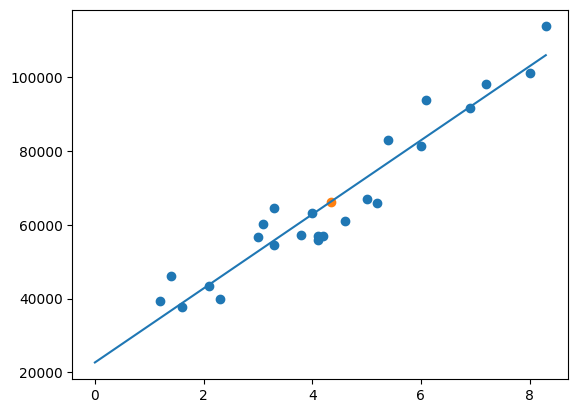

Accuracy of the Model: 89.08804674245249


In [69]:
LinearRegression(graph=True, acc=True)

In [53]:
LinearRegression(0.5)

27684.47785720668
